# Plot Functional Connectivity

In [1]:
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline

# import seaborn as sns
# sns.set_theme(
#     context="paper", 
#     style="whitegrid", 
#     font_scale=1.2,
#     rc={'figure.figsize': (10, 10), 'figure.dpi': 300}
# )

In [2]:
from common.data import get_subject_id_from_path, get_fc_data, get_data
from common.paths import HEALTHY, ADHD
from common.plotting import create_power_fc_matrix, plot_connections, plot_fc_matrix
from sklearn.preprocessing import StandardScaler

## Plot One Power FC

In [9]:
sample_subject_id = "NDARAP912JK3"
fcs = get_fc_data()

print("Number of functional connectivity:", len(fcs))
print("Number of features (connections):", fcs[sample_subject_id].shape)

Number of functional connectivity: 880
Number of features (connections): (34716,)


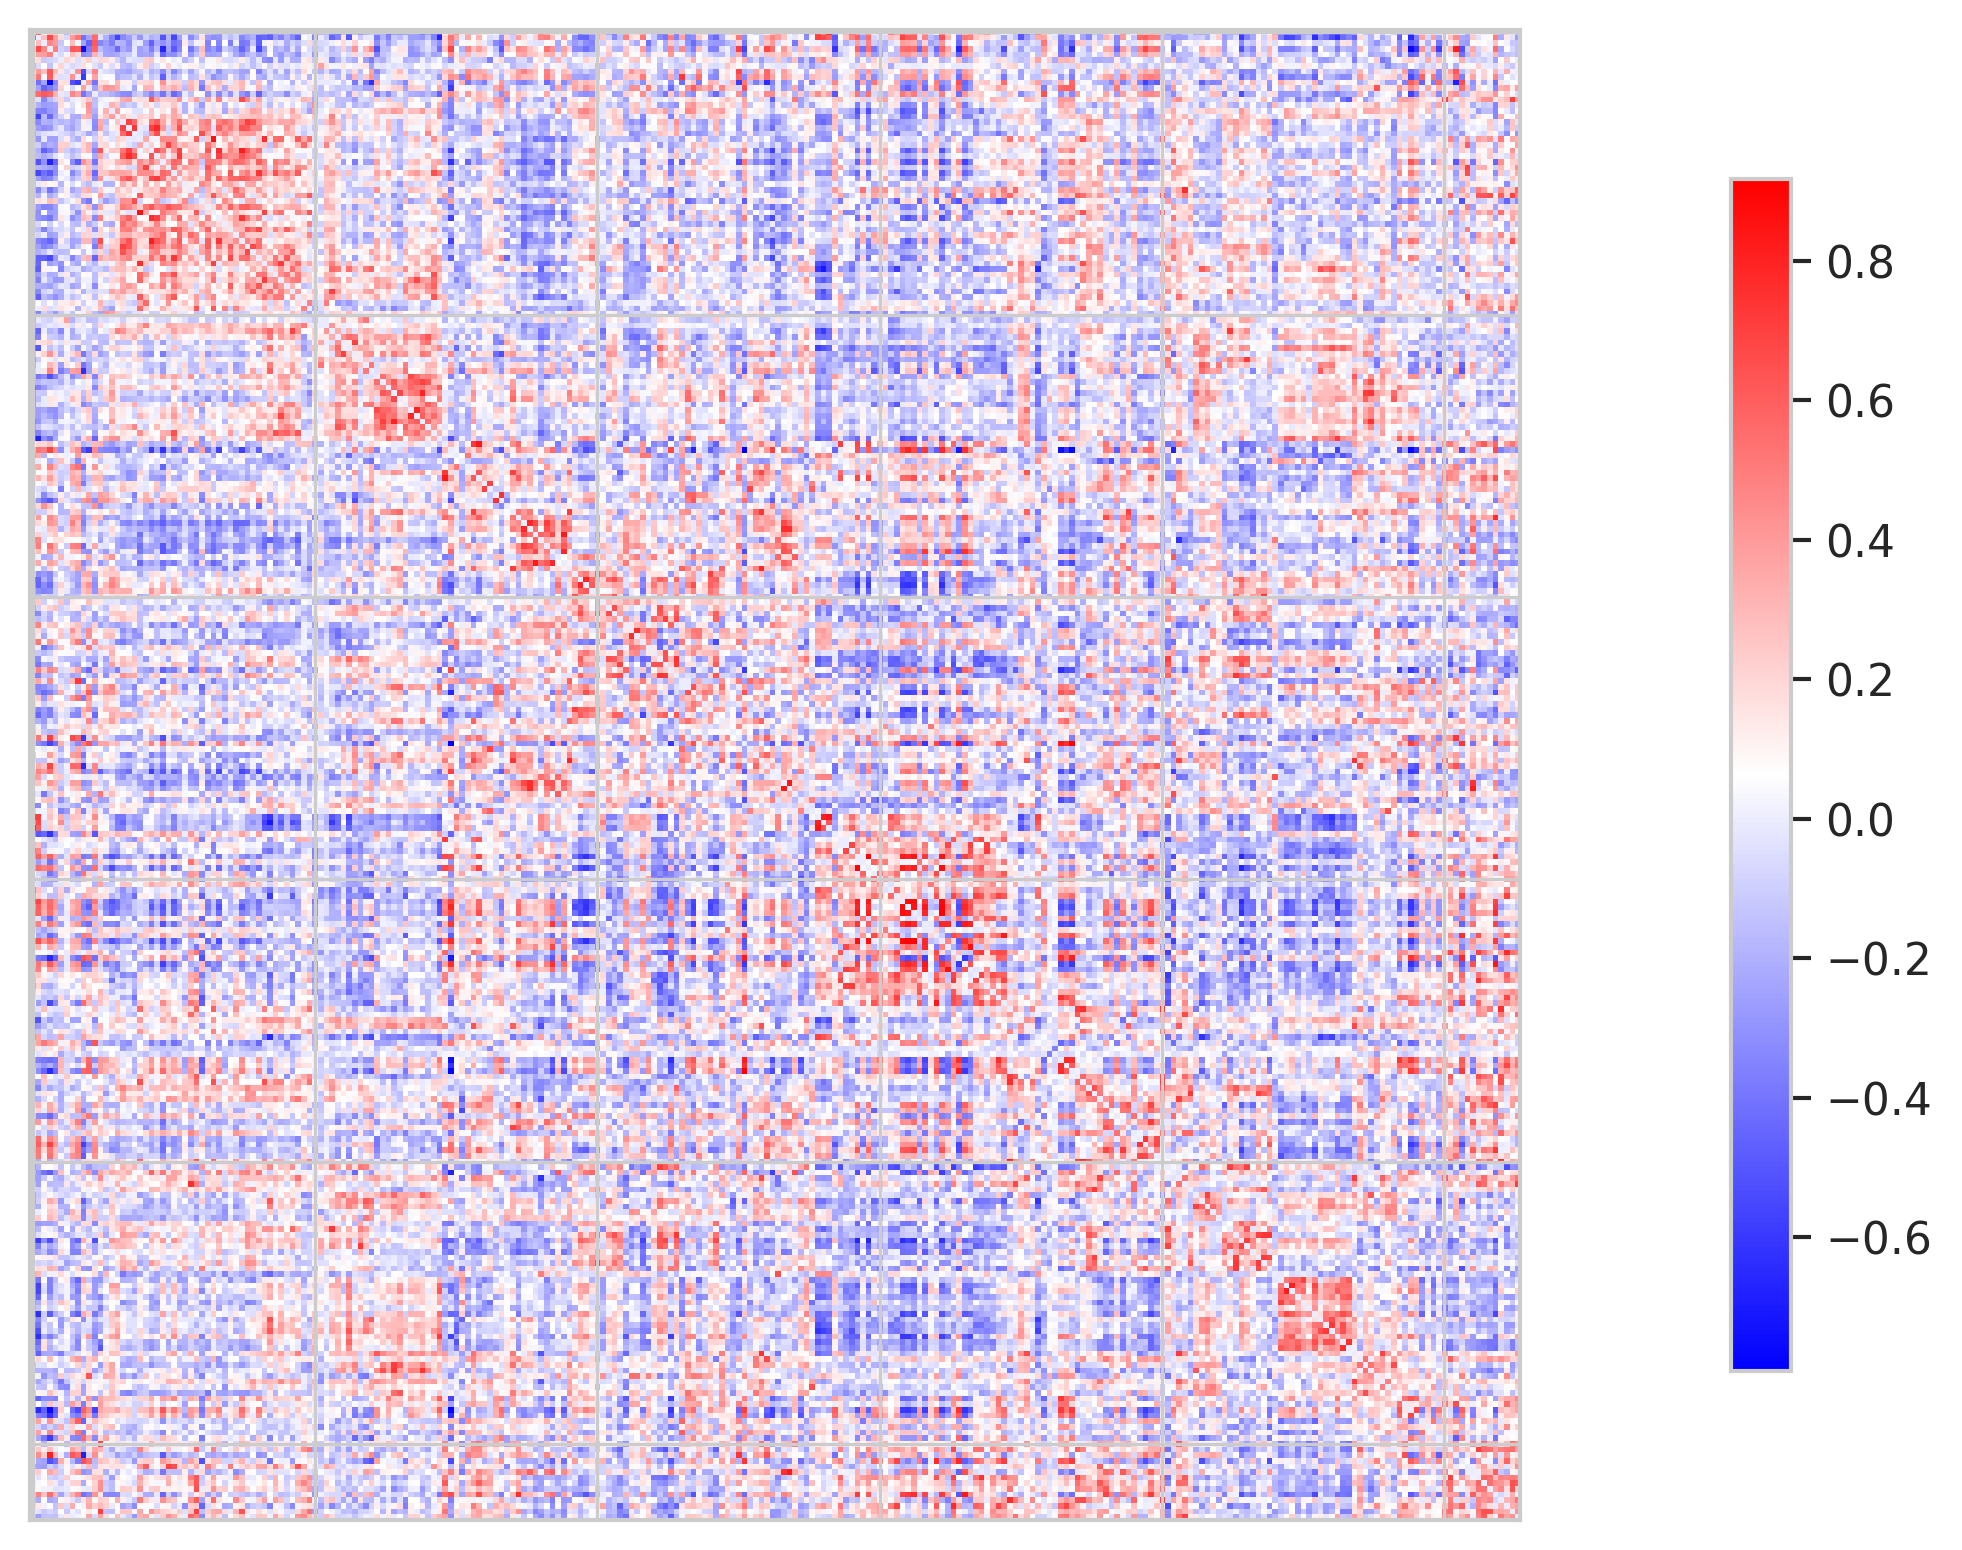

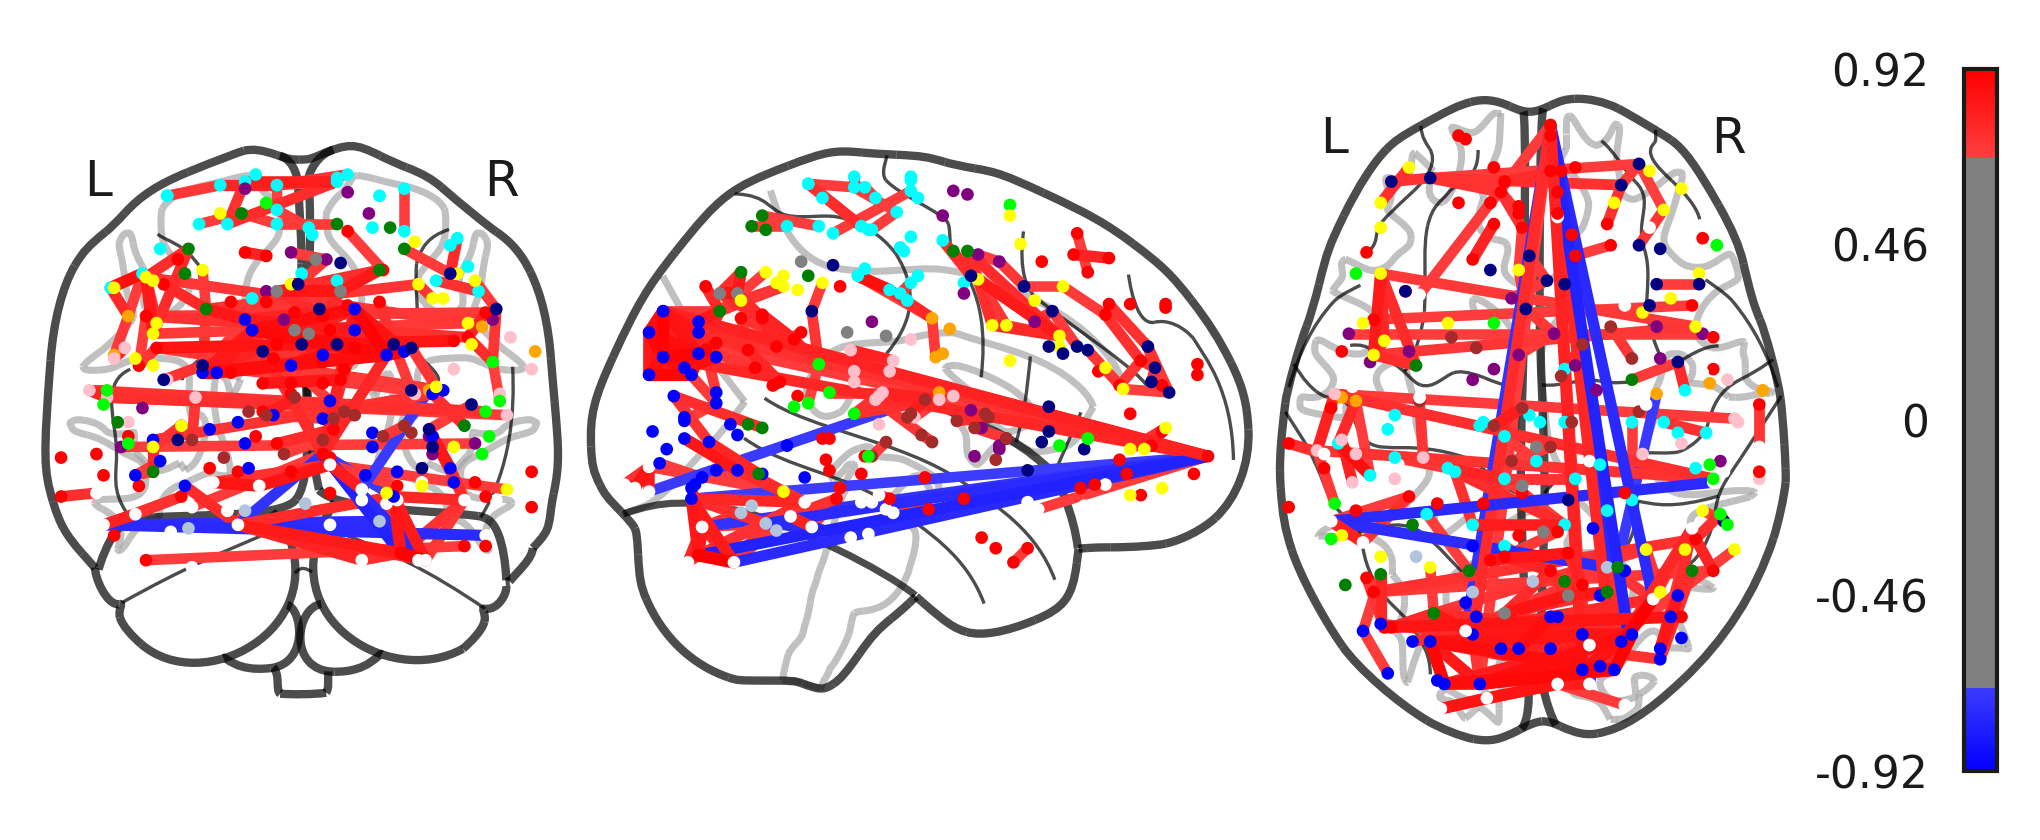

In [18]:
plot_connections(fcs[sample_subject_id], threshold="99.5%")

## Plot Multiple Power FC

In [6]:
X, Y, demographics, population, X_ids = get_data(label_path=ADHD)
X = StandardScaler().fit_transform(X)

print(f'X: {X.shape} | Y: {len(Y.keys())} | Population: {population} | IDs: {len(X_ids)}')

X: (380, 34716) | Y: 6 | Population: adhd | IDs: 380


In [35]:
start = 0
end = 390
X_t, X_ids_t = X[start:end], X_ids[start:end]

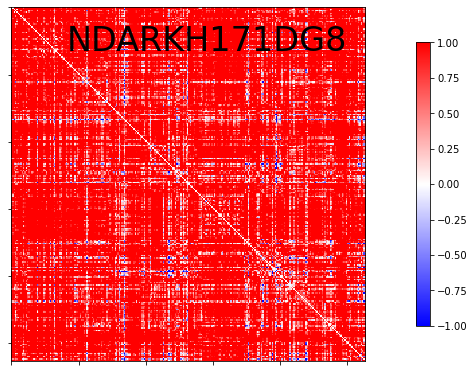

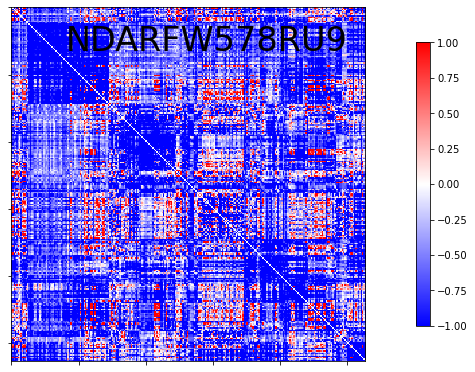

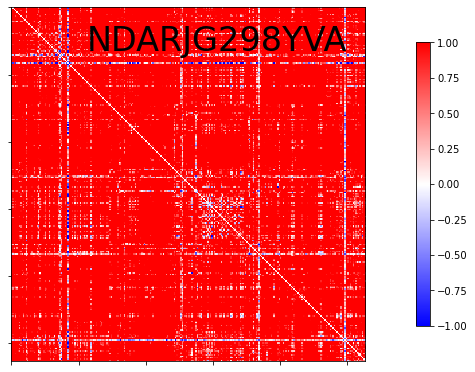

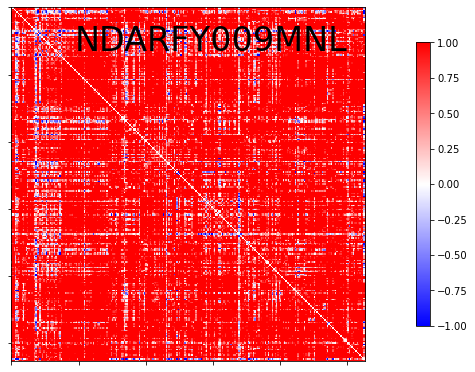

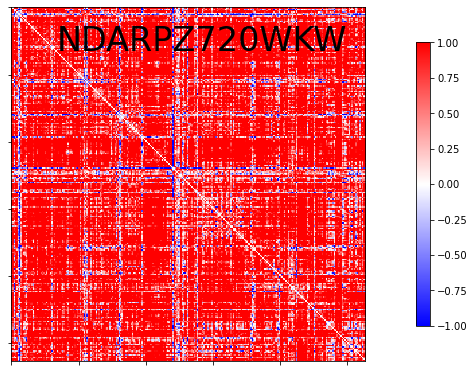

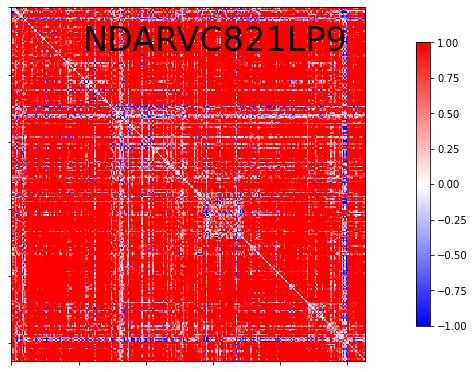

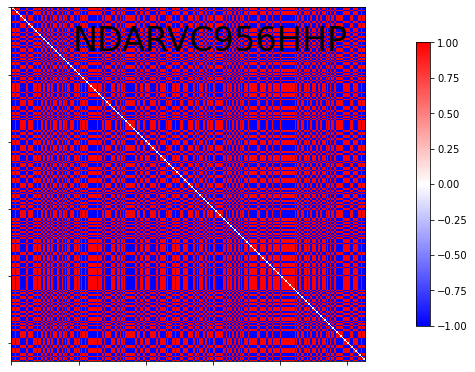

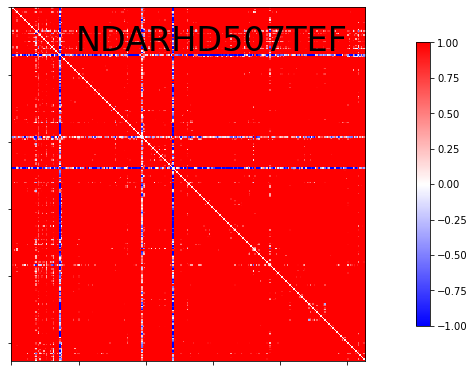

In [38]:
filter_list = ['NDARKH171DG8', 'NDARJG298YVA', 'NDARFY009MNL', 'NDARPZ720WKW', 
               'NDARVC821LP9', 'NDARVC956HHP', 'NDARHD507TEF', 'NDARFW578RU9']

for fc, fc_id in zip(X_t, X_ids_t):
#     print(fc_id)
    if fc_id in filter_list:
        plot_fc_matrix(create_power_fc_matrix(fc), -1, 1, title=fc_id)